In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

import os
import os.path as path
import wget

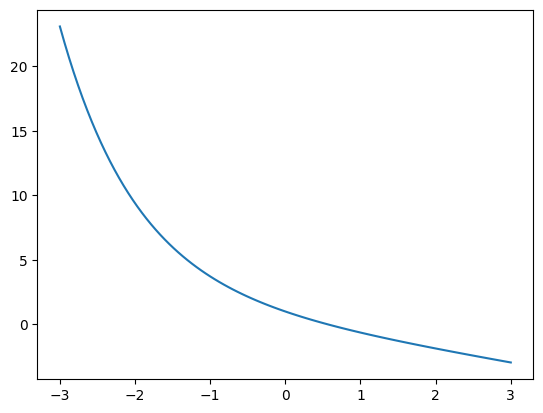

In [133]:
x=np.linspace(-3,3,100)
y=(np.e**(-x))-x
plt.plot(x,y,scaley=2)

Vamos a tomar como puntos xo =-2 y x1=2 como se puede ver f(x0)<0 y f(x1)>0

In [134]:
x_0=-2
x_1=2
x_2=(x_0+x_1)/2

np.e




2.718281828459045

punto c

In [135]:
def fun(x_0):
    y_0=np.e**(-x_0)-x_0
    return y_0


In [136]:

y_0=fun(x_0)
y_1=fun(x_1)
y_2=fun(x_2)




Punto D

In [137]:
def interpolate(y_1,y_2,x_1,x_2):
    ans=(y_2-y_1)/(x_2-x_1)
    return ans

In [138]:
def interpolación(y_1,y_2,x_1,x_2):
    a=interpolate(interpolate(y_1,y_2,x_1,x_2),interpolate(y_0,y_1,x_0,x_1),x_2,x_0)
    b=interpolate(y_0,y_1,x_0,x_1)-(x_0+x_1)*a
    c=y_0-x_0*interpolate(y_0,y_1,x_0,x_1)+x_0*x_1*a
    print(b,c)
    return [a,b,c]
coef=interpolación(y_1,y_2,x_1,x_2)

-2.813430203923509 0.9999999999999996


In [139]:
coef

[0.6905489227709077, -2.813430203923509, 0.9999999999999996]

In [140]:
def punto_x3(coef=list):
    x_3=0

    if coef[1]<0:
        x_3=-2*coef[2]/(coef[1]-np.sqrt((coef[1]**2)-(4*coef[0]*coef[2])))
    if coef[1]>0:
        x_3=-2*coef[2]/(coef[1]+np.sqrt((coef[1]**2)-(4*coef[0]*coef[2])))

    return x_3
punto_x3(coef)


0.3934301166710446

In [141]:
def iteración(coef,limit=100):
    it=1
    x_3=punto_x3(coef)
    epsilon=abs(fun(x_3))
   
    while epsilon>10**-9 and it<limit:
        x_0=x_1
        x_1=x_2
        x_2=x_3
        y_0=fun(x_0)
        y_1=fun(x_1)
        y_2=fun(x_2)
        
        coef=interpolación(y_1,y_2,x_1,x_2)
        
        x_3=punto_x3(coef)
        it+=1
        epsilon=abs(fun(x_3))
        print(x_3)
    return x_3
    
iteración(coef,limit=100)
    

-0.23631488327651443
0.327700518714266
nan


C:\Users\windows 10\AppData\Local\Temp\ipykernel_19032\299519933.py:5: RuntimeWarning: invalid value encountered in sqrt
  x_3=-2*coef[2]/(coef[1]-np.sqrt((coef[1]**2)-(4*coef[0]*coef[2])))


nan

In [142]:
print(punto_x3(coef))

nan


C:\Users\windows 10\AppData\Local\Temp\ipykernel_19032\299519933.py:5: RuntimeWarning: invalid value encountered in sqrt
  x_3=-2*coef[2]/(coef[1]-np.sqrt((coef[1]**2)-(4*coef[0]*coef[2])))
